In [ ]:
# FROM https://www.datacamp.com/community/tutorials/finance-python-trading

In [1]:
import pandas_datareader as pdr
import datetime
import quandl
import matplotlib.pyplot as plt

In [4]:
import csv
# with open('../companylist_NYSE.csv')
import json
with open('../DataSets/NASDAQ.json') as nq:
    nasdaq = json.load(nq)

In [18]:
start2018 = datetime.datetime(2018,1,1)
end2018 = datetime.datetime(2018,12,31)
start2017 = datetime.datetime(2017,1,1)
end2017 = datetime.datetime(2017,12,31)
companyList = nq

In [15]:
print(nasdaq)

['AABA', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABAC', 'ABCB', 'ABDC', 'ABEO', 'ABEOW', 'ABIL', 'ABIO', 'ABMD', 'ABTX', 'ABUS', 'ACAD', 'ACBI', 'ACER', 'ACET', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHN', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACWI', 'ACWX', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADOM', 'ADP', 'ADRA', 'ADRD', 'ADRE', 'ADRO', 'ADRU', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXS', 'AEGN', 'AEHR', 'AEIS', 'AEMD', 'AERI', 'AETI', 'AEY', 'AEYE', 'AEZS', 'AFH', 'AFHBL', 'AFIN', 'AFMD', 'AGEN', 'AGFS', 'AGFSW', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCB', 'AGNCN', 'AGND', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHPI', 'AIA', 'AIHS', 'AIMC', 'AIMT', 'AINV', 'AIPT', 'AIQ', 'AIRG', 'AIRR', 'AIRT', 'AKAM', 'AKAO', 'AKBA', 'AKCA', 'AKER', 'AKRX', 'AKTS', 'AKTX', 'ALAC', 'ALACR', 'ALACU', 'ALACW', 'ALBO', 'ALCO', 'ALDR', 'ALDX', 'ALGN', 'ALGR', 'ALGRR', 'ALGRU', 'ALGRW', 'ALGT', '

In [20]:
print(nasdaq[0])
nasdaq[nasdaq[0]] = 12
# fore(nasdaq) = (nasdaq[n],start2018,end2018);

AABA


TypeError: list indices must be integers or slices, not str

In [16]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2018, 12, 1))
aapl2 = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2018-12-01")
amazon = pdr.get_data_yahoo('AMZN', 
                          start=datetime.datetime(2005, 10, 1), 
                          end=datetime.datetime(2018, 12, 3))
fb = pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2018, 12, 3))
abc = pdr.get_data_yahoo('GOOGL', 
                          start=datetime.datetime(2005, 10, 1), 
                          end=datetime.datetime(2018, 12, 3))
estc = pdr.get_data_yahoo('ESTC', 
                          start=datetime.datetime(2018, 9, 1), 
                          end=datetime.datetime(2018, 12, 3))
upwk = pdr.get_data_yahoo('UPWK', 
                          start=datetime.datetime(2018, 9, 1), 
                          end=datetime.datetime(2018, 12, 3))

In [17]:
# aapl.describe()
print(aapl)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2006-10-02   10.838572   10.614285   10.728572   10.694285  178159800.0   
2006-10-03   10.707143   10.455714   10.635715   10.582857  197677200.0   
2006-10-04   10.780000   10.451428   10.585714   10.768572  207270700.0   
2006-10-05   10.880000   10.590000   10.647142   10.690000  170970800.0   
2006-10-06   10.720000   10.544286   10.631429   10.602858  116739700.0   
2006-10-09   10.725715   10.504286   10.542857   10.661428  109555600.0   
2006-10-10   10.654285   10.440000   10.648571   10.544286  132897100.0   
2006-10-11   10.568571   10.371428   10.488571   10.461429  142963800.0   
2006-10-12   10.770000   10.514286   10.515715   10.751429  148213800.0   
2006-10-13   10.982857   10.677143   10.804286   10.717143  171049200.0   
2006-10-16   10.840000   10.684286   10.741428   10.771428  127173200.0   
2006-10-17   10.752857   

In [13]:
fb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1554.000000,1554.000000,1554.000000,1554.000000,1.554000e+03,1554.000000
mean,103.651780,101.483578,102.599871,102.621821,3.524671e+07,102.621821
std,51.585463,50.809685,51.209930,51.244696,2.800170e+07,51.244696
min,19.059999,18.799999,19.000000,18.980000,5.913100e+06,18.980000
25%,64.315002,62.380000,63.470000,63.375000,1.812062e+07,63.375000
50%,99.360001,96.689999,97.850002,97.915001,2.599355e+07,97.915001
75%,147.709999,144.272499,145.812504,145.445000,4.325520e+07,145.445000
max,218.619995,214.270004,215.720001,217.500000,3.654579e+08,217.500000


In [5]:
cyad.describe()

,High,Low,Open,Close,Volume,Adj Close
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,37.397509,36.166751,36.874028,36.715439,7690.307339,36.715439
std,12.016782,11.590376,11.834158,11.765089,33492.983037,11.765089
min,16.920000,16.309999,16.309999,16.698000,0.000000,16.698000
25%,27.042500,25.900000,26.566999,26.500000,1000.000000,26.500000
50%,37.834999,36.576000,37.145000,37.000000,2800.000000,37.000000
75%,46.802249,45.250000,46.169998,45.878249,6800.000000,45.878249
max,67.940002,62.570000,66.330002,64.000000,892900.000000,64.000000


In [12]:
abc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-27,1066.760010,1045.500000,1051.339966,1052.280029,1652400.0,1052.280029
2018-11-28,1092.859985,1042.949951,1057.459961,1091.790039,2302100.0,1091.790039
2018-11-29,1100.150024,1082.000000,1083.530029,1094.579956,1550200.0,1094.579956
2018-11-30,1109.650024,1083.180054,1095.630005,1109.650024,2980900.0,1109.650024
2018-12-03,1135.000000,1111.849976,1132.160034,1116.359985,2874329.0,1116.359985


In [7]:
ts = aapl['Close'][-10:]

In [8]:
type(ts)

pandas.core.series.Series

In [9]:
print(ts)

Date
2018-11-16    193.529999
2018-11-19    185.860001
2018-11-20    176.979996
2018-11-21    176.779999
2018-11-23    172.289993
2018-11-26    174.619995
2018-11-27    174.240005
2018-11-28    180.940002
2018-11-29    179.550003
2018-11-30    178.580002
Name: Close, dtype: float64


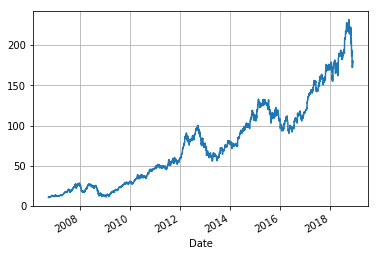

In [17]:
aapl['Close'].plot(grid=True)
plt.show()